In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
sns.set_context("talk")

# Exercise 1

Euler algorithm

In [2]:
# Set parameters
N_T = 10**4
DELTA_T = 0.001 # 0.1, 0.01, 0.001

# Set time steps
j = np.arange(1, N_T/DELTA_T+1)

In [3]:
# Initialize arrays
x = np.zeros_like(j, dtype=np.float64)
v = np.zeros_like(j, dtype=np.float64)

# Set initial conditions
x[0] = 0.
v[0] = 1.

# Euler method
for i in range(j.shape[0]-1):
    x[i+1] = x[i] + v[i] * DELTA_T
    v[i+1] = v[i] - x[i] * DELTA_T

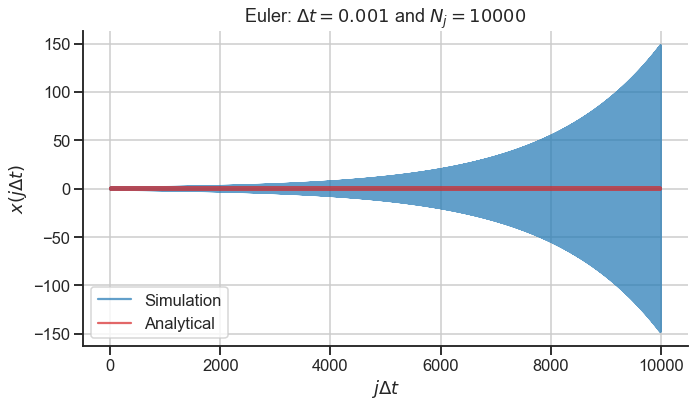

In [4]:
# Plot Euler

colors = sns.color_palette()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(j*DELTA_T, x, label="Simulation", color=colors[0], alpha=0.7)
ax.plot(j*DELTA_T, np.sin(j*DELTA_T), label="Analytical", color=colors[3], alpha=0.7)

ax.set_xlabel(r"$j \Delta t$")
ax.set_ylabel(r"$x \left(j \Delta t \right)$")

ax.grid()
ax.legend(loc="lower left")

ax.set_title(r"Euler: $\Delta t = {:}$ and $N_j = {:}$".format(DELTA_T, N_T))

plt.tight_layout()
sns.despine()
plt.savefig(f"figures/CP_exercise_5_A1_{DELTA_T}_{N_T}.pdf")
plt.show()

# Exercise 2

Euler-Cromer algorithm

In [5]:
# Set parameters
N_T = 10**3 # 10**2, 10**3
DELTA_T = 0.01 # 0.1, 0.01

# Set time steps
j = np.arange(0, N_T)

In [6]:
# Initialize arrays
x_a = np.zeros(N_T, dtype=np.float64)
v_a = np.zeros(N_T, dtype=np.float64)

# Set initial conditions
x_a[0] = 0.
v_a[0] = 1.

# Euler-Cromer method (a)
for i in range(N_T-1):
    v_a[i+1] = v_a[i] - x_a[i]* DELTA_T
    x_a[i+1] = x_a[i] + v_a[i+1] * DELTA_T

# Calculate energy
E_a = 0.5 * v_a**2 + 0.5 * x_a**2

In [7]:
# Initialize arrays
x_b = np.zeros(N_T, dtype=np.float64)
v_b = np.zeros(N_T, dtype=np.float64)

# Set initial conditions
x_b[0] = 0.
v_b[0] = 1.

# Euler-Cromer method (b)
for i in range(N_T-1):
    x_b[i+1] = x_b[i] + v_b[i]*DELTA_T
    v_b[i+1] = v_b[i] - x_b[i+1]*DELTA_T

# Calculate energy
E_b = 0.5 * v_b**2 + 0.5 * x_b**2

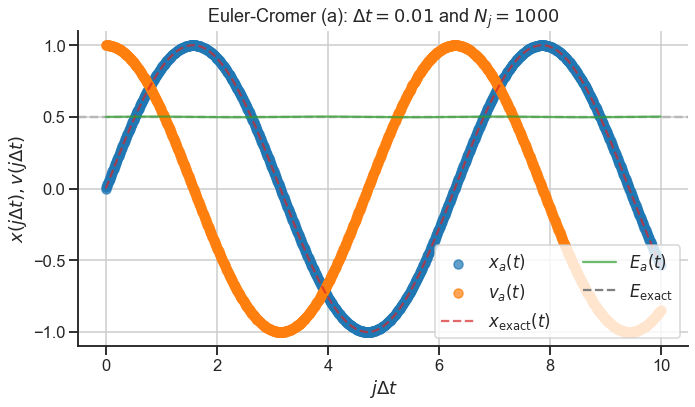

In [8]:
# Plot Euler-Cromer (a)

colors = sns.color_palette()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.scatter(j*DELTA_T, x_a, label=r"$x_a(t)$", color=colors[0], alpha=0.7)
ax.scatter(j*DELTA_T, v_a, label=r"$v_a(t)$", color=colors[1], alpha=0.7)

ax.plot(j*DELTA_T, np.sin(j*DELTA_T), label=r"$x_{\mathrm{exact}}(t)$", color=colors[3], alpha=0.7, linestyle="--")

ax.plot(j*DELTA_T, E_a, label=r"$E_a(t)$", color=colors[2], alpha=0.7)
ax.axhline(0.5, color=colors[7], linestyle="--", zorder=0, label=r"$E_{\mathrm{exact}}$")

ax.set_xlabel(r"$j \Delta t$")
ax.set_ylabel(r"$x \left(j \Delta t \right), v \left(j \Delta t \right)$")

ax.set_yticks(np.arange(-1, 1.1, 0.5))

ax.set_title(r"Euler-Cromer (a): $\Delta t = {:}$ and $N_j = {:}$".format(DELTA_T, N_T))

ax.grid()
ax.legend(loc="lower right", ncol=2)

plt.tight_layout()
sns.despine()
plt.savefig(f"figures/CP_exercise_5_A2_a_{DELTA_T}_{N_T}.pdf")
plt.show()

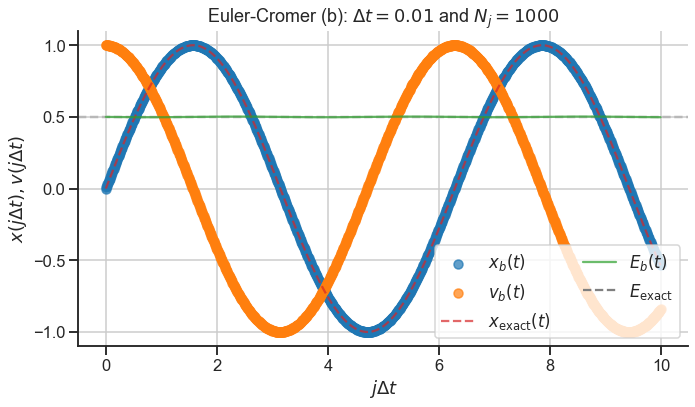

In [9]:
# Plot Euler-Cromer (b)

colors = sns.color_palette()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.scatter(j*DELTA_T, x_b, label=r"$x_b(t)$", color=colors[0], alpha=0.7)
ax.scatter(j*DELTA_T, v_b, label=r"$v_b(t)$", color=colors[1], alpha=0.7)

ax.plot(j*DELTA_T, np.sin(j*DELTA_T), label=r"$x_{\mathrm{exact}}(t)$", color=colors[3], alpha=0.7, linestyle="--")

ax.plot(j*DELTA_T, E_b, label=r"$E_b(t)$", color=colors[2], alpha=0.7)
ax.axhline(0.5, color=colors[7], linestyle="--", zorder=0, label=r"$E_{\mathrm{exact}}$")

ax.set_xlabel(r"$j \Delta t$")
ax.set_ylabel(r"$x \left(j \Delta t \right), v \left(j \Delta t \right)$")

ax.set_yticks(np.arange(-1, 1.1, 0.5))

ax.set_title(r"Euler-Cromer (b): $\Delta t = {:}$ and $N_j = {:}$".format(DELTA_T, N_T))

ax.grid()
ax.legend(loc="lower right", ncol=2)

plt.tight_layout()
sns.despine()
plt.savefig(f"figures/CP_exercise_5_A2_b_{DELTA_T}_{N_T}.pdf")
plt.show()

# Exercise 3

Velocity Verlet algorithm

In [10]:
# Set parameters
N_T = 10**2
DELTA_T = 0.1

# Set time steps
j = np.arange(0, N_T)

In [11]:
# Initialize arrays
x_v = np.zeros(N_T, dtype=np.float64)
v_v = np.zeros(N_T, dtype=np.float64)
a_v = np.zeros(N_T, dtype=np.float64)

# Set initial conditions
x_v[0] = 0.
v_v[0] = 1.
a_v[0] = -x_v[0]

# Velocity Verlet method
for i in range(0, N_T-1):
    x_v[i+1] = x_v[i] + v_v[i] * DELTA_T + 0.5*a_v[i]*DELTA_T**2
    a_v[i+1] = -x_v[i+1]
    v_v[i+1] = v_v[i] + 0.5 * (a_v[i] + a_v[i+1]) * DELTA_T

# Calculate energy
E_v = 0.5 * v_v**2 + 0.5 * x_v**2

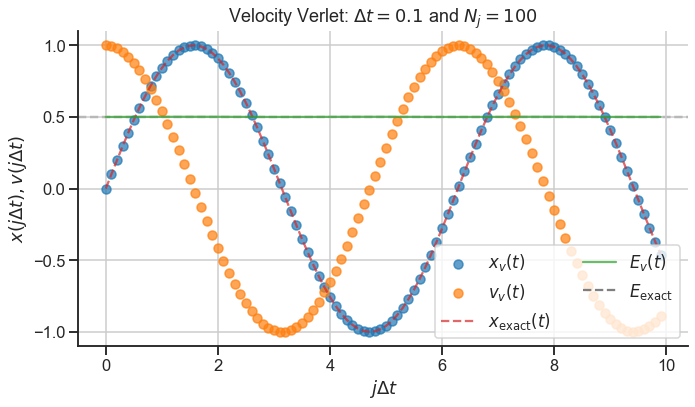

In [12]:
# Plot velocity Verlet

colors = sns.color_palette()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.scatter(j*DELTA_T, x_v, label=r"$x_v(t)$", color=colors[0], alpha=0.7)
ax.scatter(j*DELTA_T, v_v, label=r"$v_v(t)$", color=colors[1], alpha=0.7)
ax.plot(j*DELTA_T, np.sin(j*DELTA_T), label=r"$x_{\mathrm{exact}}(t)$", color=colors[3], alpha=0.7, linestyle="--")

ax.plot(j*DELTA_T, E_v, label=r"$E_v(t)$", color=colors[2], alpha=0.7)
ax.axhline(0.5, color=colors[7], linestyle="--", zorder=0, label=r"$E_{\mathrm{exact}}$")

ax.set_xlabel(r"$j \Delta t$")
ax.set_ylabel(r"$x \left(j \Delta t \right), v \left(j \Delta t \right)$")

ax.set_yticks(np.arange(-1, 1.1, 0.5))

ax.set_title(r"Velocity Verlet: $\Delta t = {:}$ and $N_j = {:}$".format(DELTA_T, N_T))

ax.grid()
ax.legend(loc="lower right", ncol=2)

plt.tight_layout()
sns.despine()
plt.savefig(f"figures/CP_exercise_5_A3_{DELTA_T}.pdf")
plt.show()

# Exercise 4

Velocity Verlet algorithm: Coupled Harmonic Oscillators

In [56]:
# Set parameters
N = 128 # 4, 16, 128
N_T = 10**4 # 10**3, 10**4
DELTA_T = 0.01 # 0.1, 0.01 

initial_conditions = 3 # 1, 2, 3

# Set time steps
j = np.arange(0, N_T)

In [57]:
def a(x_k):
    """
    Acceleration for the coupled harmonic oscillators

    Input:
    x_k : array of floats (N, 1)
        Array of positions of the N harmonic oscillators
    
    Output:
    a_k : array of floats (N, 1)
        Array of accelerations of the N harmonic oscillators
    """
    
    # Initialize acceleration array
    N = x_k.shape[0]
    a_k = np.zeros_like(x_k)

    # Acceleration for the first and last oscillator
    a_k[0] = -(x_k[0] - x_k[1])
    a_k[N-1] = -(x_k[N-1] - x_k[N-2])

    # Acceleration for the rest of the oscillators
    for i in range(1, N-1):
        a_k[i] = -(2*x_k[i] - x_k[i-1] - x_k[i+1])
        
    return a_k

In [58]:
# Initialize arrays
x_kj = np.zeros((N, N_T), dtype=np.float64)
v_kj = np.zeros((N, N_T), dtype=np.float64)

# Set different initial conditions

if initial_conditions == 1:
    v_kj[:, 0] = 0.
    x_kj[:, 0] = 0.
    x_kj[N//2 - 1, 0] = 1.

elif initial_conditions == 2:
    j_ini = 1
    v_kj[:, 0] = 0.
    x_kj[:, 0] = np.sin(np.pi*j_ini*np.arange(1, N+1)/(N+1))

elif initial_conditions == 3:
    j_ini = N/2
    v_kj[:, 0] = 0.
    x_kj[:, 0] = np.sin(np.pi*j_ini*np.arange(1, N+1)/(N+1))

# Velocity Verlet method
for i in range(0, N_T-1):
    x_kj[:, i+1] = x_kj[:, i] + v_kj[:, i]*DELTA_T + 0.5*a(x_kj[:, i])*DELTA_T**2
    v_kj[:, i+1] = v_kj[:, i] + 0.5*(a(x_kj[:, i]) + a(x_kj[:, i+1]))*DELTA_T

# Calculate energy
E = 0.5*np.sum(v_kj**2, axis=0) + 0.5*np.sum((x_kj[1:] - x_kj[:-1])**2, axis=0)

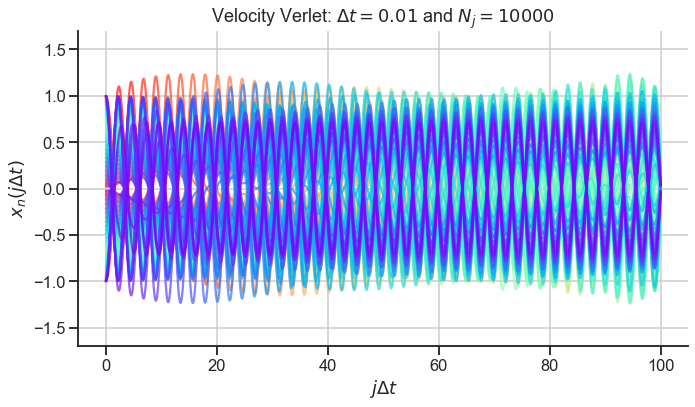

In [59]:
# Plot velocity Verlet for coupled harmonic oscillators

colors = sns.color_palette("rainbow", N)[::-1]
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i in range(N):
    ax.plot(j*DELTA_T, x_kj[i], label=r"$x_{:}(t)$".format(i+1), color=colors[i], alpha=0.7)

ax.plot(j*DELTA_T, E, label=r"$E(t)$", color=sns.color_palette()[7], alpha=1, zorder=10**3)

ax.set_xlabel(r"$j \Delta t$")
ax.set_ylabel(r"$x_n \left(j \Delta t \right)$")

ax.set_yticks(np.arange(-2, 2.1, 0.5))
ax.set_ylim(-1.7, 1.7)

ax.set_title(r"Velocity Verlet: $\Delta t = {:}$ and $N_j = {:}$".format(DELTA_T, N_T))
ax.grid()

plt.tight_layout()
sns.despine()
plt.savefig(f"figures/CP_exercise_5_A4_N{N}_{DELTA_T}_cond{initial_conditions}.pdf")
plt.show()

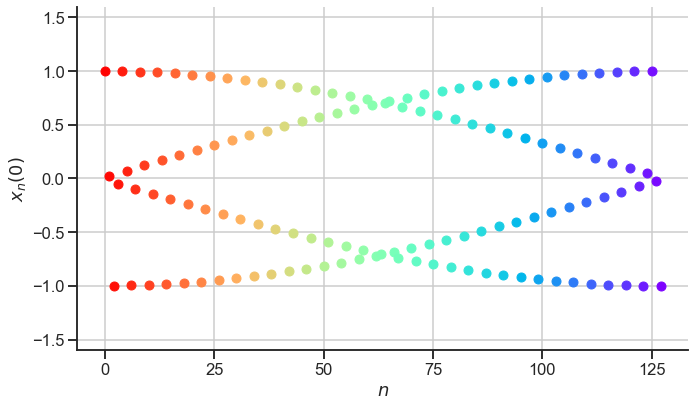

In [60]:
# (Plotting the initial conditions)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i, x in enumerate(np.arange(0, N)):
    ax.plot(x, x_kj[i, 0], "o", color=colors[i])

ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$x_n(0)$")
ax.set_ylim(-1.6, 1.6)

ax.set_yticks(np.arange(-1.5, 2, 0.5))
ax.set_xticks(np.arange(0, N, 25))

ax.grid()

plt.tight_layout()
sns.despine()
plt.savefig(f"figures/CP_exercise_5_A4_N{N}_initial_cond{initial_conditions}.pdf")
plt.show()